In [1]:
import sys
import os

# Add the directory containing the utility module to the system path
sys.path.append(os.path.abspath('/workspaces/flask_server'))

import pandas as pd
import numpy as np
from utility.lags import sig_lag
from models.stacking import *
from forecast.forecast_uni import *


df = pd.read_csv('/workspaces/flask_server/test/data/candy_production.csv', index_col=0, parse_dates=True)
df

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100
...,...
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [3]:
# Split the data
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(12, 1, 0))  # (p, d, q) - you may need to tune these parameters
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 57.83399140317512


In [4]:
forecast = pd.DataFrame(forecast)


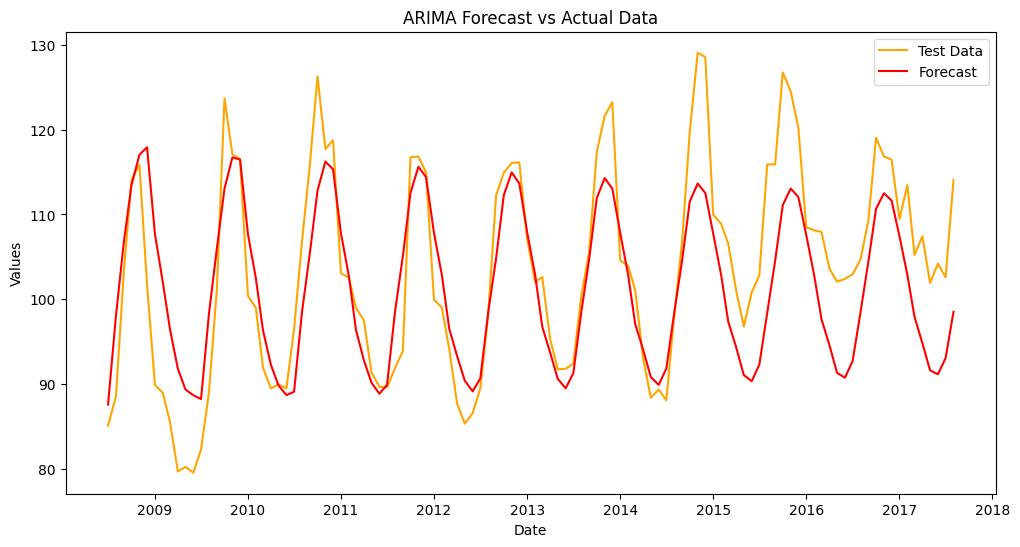

In [5]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()